In [8]:
%%html
<style>
table {float:left}
</style>

In [9]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 603613 国联股份

In [10]:
ticker = '603613'

In [11]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)

In [12]:
change = income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '归属于母公司所有者的净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,归属于母公司所有者的净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
91363,2019-12-31,1.589421e+08,1.32,1.32,95.9,96.9,69.3
91364,2018-12-31,9.386138e+07,0.89,0.89,83.7,84.2,59.8
91368,2017-12-31,5.874600e+07,0.59,0.59,119.9,117.8,145.6
91372,2016-12-31,2.392139e+07,0.29,0.29,348.5,367.6,99.2
91379,2015-12-31,1.200752e+07,0.33,0.33,61.3,59.8,107.7
91383,2014-12-31,5.781975e+06,0.15,0.15,-8.8,-2.0,-60.0
91387,2013-12-31,1.445544e+07,0.44,0.43,9.3,6.6,26.7
91390,2012-12-31,1.140564e+07,0.38,0.38,NaN,NaN,NaN


In [13]:
change = incomeq[['营业收入', '归属于母公司所有者的净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '归属于母公司所有者的净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,归属于母公司所有者的净利润,营业收入,归属于母公司所有者的净利润
148677,2020-09-30,4.224092e+09,65054824.36,155.5,92.7
148678,2020-06-30,3.426365e+09,73011564.58,137.1,69.4
148679,2020-03-31,2.381318e+09,40725617.18,127.4,86.0
148680,2019-12-31,3.052343e+09,60315255.78,128.8,84.9
148681,2019-09-30,1.653088e+09,33751432.44,87.8,71.3
148682,2019-06-30,1.444934e+09,43110393.67,59.2,40.1
148683,2019-03-31,1.047315e+09,21897126.85,89.8,103.5
148684,2018-12-31,1.334007e+09,32624931.40,101.2,44.0
148685,2018-09-30,8.801432e+08,19697616.43,116.1,72.3
148686,2018-06-30,9.077189e+08,30779878.12,65.0,40.7


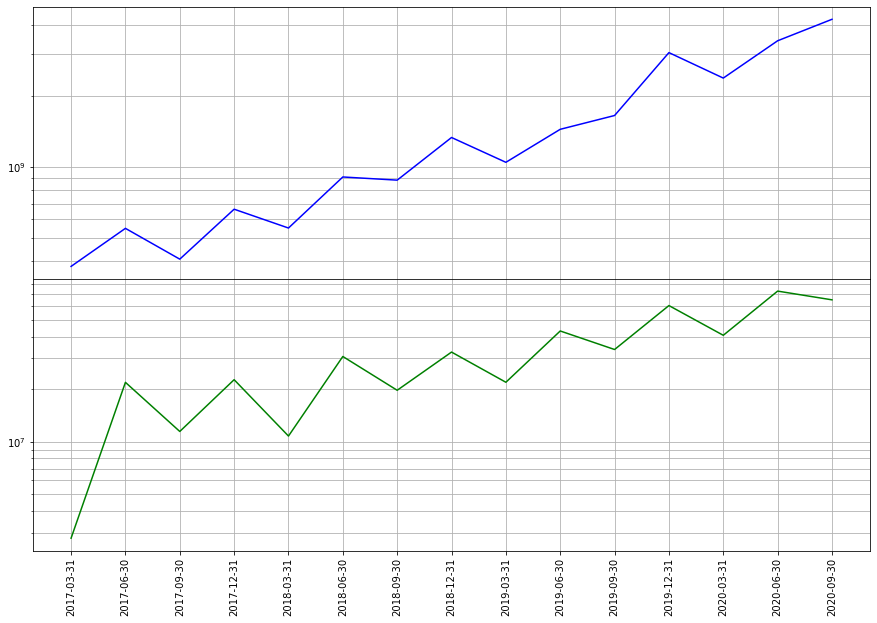

In [14]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [15]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,6.3,2.6
2018-12-31,8.3,2.9
2017-12-31,10.0,3.1
2016-12-31,13.3,2.7
2015-12-31,48.1,5.9
2014-12-31,72.0,4.6
2013-12-31,68.8,10.5
2012-12-31,70.3,9.0


In [16]:
df = data.get_market(ticker)
df['前复权'] = df['收盘价'] * df['累积前复权因子']
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价          累积前复权因子              滚动市盈率  \
            min        max    min    max       min       max      min   
交易日期                                                                    
2019 2019-07-30 2019-12-31  21.79   79.2  0.688924  0.688924  32.6903   
2020 2020-01-02 2020-10-19  66.70  134.5  0.688924  1.000000  71.8495   

                      前复权              
           max        min         max  
交易日期                                   
2019   85.3315  15.011644   54.562744  
2020  144.2999  46.137209  103.110000